# Coding in Action Lab II 
## Group Project A - Week 1 - Due by June 23, 23:59

You have to complete this project if your group number is in (1,4,7,10,...), i.e., if it is a multiple of 3, plus 1.

### Instructions ###

- Fill the following cell with the name, student ID and luiss email address of all members of  your team.

- Using this notebook, complete the following list of tasks, **motivating** your choices and **commenting** on your findings.

- Turn in the notebook with your work on the course page on learn.luiss.it, just once for each group.

## Task 1 (Session 1)
### Project work 1: analysis of the complexity of a sorting algorithm

- **T1:** Explain the working principles of the following sorting algorithm, and discuss its complexity in terms of the length $n$ of the input array
- **T2:** Measure the computational complexity of the algorithm experimentally, using the running time of the corrisponding function for inputs of different sizes.

This team is composed by:


Giulia Ferrandino (303641, giulia.ferrandino@studenti.luiss.it), Anna Toppino (296541, anna.toppino@studenti.luiss.it), Virginia Passeggio (290661, v.passeggio@studenti.luiss.it), Vittoria Montemarani (304901, vittoria.montemarani@studenti.luiss.it ), Sofia di Bella (304571, Sofia.dibella@studenti.luiss.it)
______

In [1]:
def BubbleSort(array):
    n = len(array)
    for i in range(n):
        already_sorted = True
        for j in range(n - i - 1):
            if array[j] > array[j + 1]:
                array[j], array[j + 1] = array[j + 1], array[j]
                already_sorted = False
        if already_sorted:
            break
    return array

T1: Bubble Sort is a sorting algorithm which involves repeatedly traversing a list, comparing adjacent elements, and swapping them if they are in the wrong order. This process continues iteratively until the entire list is sorted. Despite its straightforward implementation, Bubble Sort is generally less efficient for handling large datasets when compared to more sophisticated algorithms like quicksort or mergesort.
In the provided sorting algorithm, each iteration sweeps through the array to the \( n-i-1 \) position, progressively decreasing the number of comparisons needed as the largest elements move to the end of the list. The `already_sorted` flag serves as an optimization mechanism, identifying when the list is already in order ahead of schedule, which can decrease the total number of iterations required.
In scenarios where the list is already sorted(best case complexity), the complexity drops to 𝑂(𝑛), thanks to the early termination check. If no elements are swapped during a traversal, the algorithm concludes that the list is sorted and terminates early.
Instead, when talking about the average and worst case complexity, it becomes O(n^2). The number of comparisons and swaps grows quadratically with the size of the input list (This occurs under scenarios where the list is either nearly or completely reversed).

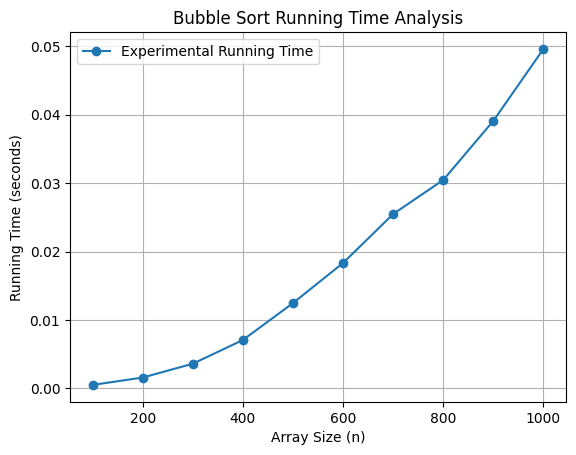

In [19]:
import time
import random
import matplotlib.pyplot as plt

# BubbleSort function that sorts an array and does not return any additional data
def BubbleSort(array):
    n = len(array)
    for i in range(n):
        already_sorted = True
        for j in range(n - i - 1):
            if array[j] > array[j + 1]:
                array[j], array[j + 1] = array[j + 1], array[j]
                already_sorted = False
        if already_sorted:
            break
    return array

# Function to measure running time of BubbleSort for different array sizes
def measure_time(size):
    these_times = []
    for _ in range(50):  # Repeat 50 times to get an average
        array = [random.randint(0, size*size//10) for _ in range(size)]
        start_time = time.time()
        BubbleSort(array)
        end_time = time.time()
        these_times.append(end_time - start_time)
    return sum(these_times) / 50

# Generate array sizes and measure running times
array_sizes = range(100, 1001, 100)
running_times = [measure_time(size) for size in array_sizes]

# Plot the running times against array sizes
plt.plot(array_sizes, running_times, marker='o', label='Experimental Running Time')
plt.xlabel('Array Size (n)')
plt.ylabel('Running Time (seconds)')
plt.title('Bubble Sort Running Time Analysis')
plt.grid(True)
plt.legend()
plt.show()


_______
_______

## Task 2 (Session 2)
### Project work 2: importing data, cleaning data, basic plots

- **T3:** Using pandas, import the dataset included in the 'data/' folder. 
- **T4:** Check and clean the dataset:
    - **T4.1:** Verify whether the dataset contains null/missing values or duplicated rows. Deal with them appropriately.
    - **T4.2:** Check the data types assigned to the columns of the dataframe and change them if needed.
- **T5:** Overview:
    - **T5.1:** Briefly describe the content of the dataset and what each column of the dataframe contains.
    - **T5.2:** Plot the statistical distribution of all numeric columns.    
_______
_______

In [20]:
#T3: using pandas we are going to import the dataset
import pandas as pd

file="data/IT_sales.csv"
dataset=pd.read_csv(file) 

In [21]:
#T4.1: we are verifing if the dataset contains for null/missing rows, and we are going to delete them if we find any, we are using .isnull() to verify if there are any null rows
#and .duplicate() to verify if there are any duplicates. .dropna() and .drop_duplicates() will delete the rows
nulli= dataset.isnull().any().any()
if nulli:
    print("Found a MISSING value.")
    dataset = dataset.dropna()

duplicati= dataset.duplicated().any()
if duplicati:
    print("Found a DUPLICATED row.")
    dataset = dataset.drop_duplicates()

Found a MISSING value.
Found a DUPLICATED row.


In [22]:
#T4.2 : Checking the data type and than trasforming the 'Order Date' from int

# T4.2
# Checking current data types
print("Current data types:")
print(dataset.dtypes)

# Transforming 'Order Date' to datetime
dataset['Order Date']=pd.to_datetime(dataset['Order Date'], format='%m/%d/%y %H:%M', dayfirst=True)

# Verify data types
print("\nModified Data types:")
print(dataset.dtypes)



Current data types:
Order ID            float64
Customer ID           int64
Product              object
Type                 object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
City                 object
dtype: object

Modified Data types:
Order ID                   float64
Customer ID                  int64
Product                     object
Type                        object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
City                        object
dtype: object


T5.1: The IT_sales.csv dataset consists of sales transaction records from an electronics store. It includes 185,950 entries across several columns that detail the specifics of each purchase. Here’s a breakdown of what each column represents:

Order ID (float64): Uniquely identifies each transaction. It is numerically represented and should be considered as an integer for practical purposes.
Customer ID (int64): Numerical identifier for customers, suggesting linkage to a broader customer database.
Product (object): Describes the product purchased, with 19 unique items recorded, including popular entries like "Apple Airpods Headphones" and "Flatscreen TV".
Type (object): Categorizes products into 8 types such as "Headphones" and "TV".
Quantity Ordered (float64): Indicates the number of units purchased per transaction.
Price Each (float64): Lists the price for each unit, varying widely from $2.99 to $1700, reflecting a diverse range of product types and prices.
Order Date (object that we transformed into datatime64): Provides the date and time of each transaction in the format MM/DD/YY HH:MM.
Purchase Address (object): Gives the shipping address for each order.
City (object): Specifies the city for the purchase address, with San Francisco recording the highest number of transactions.

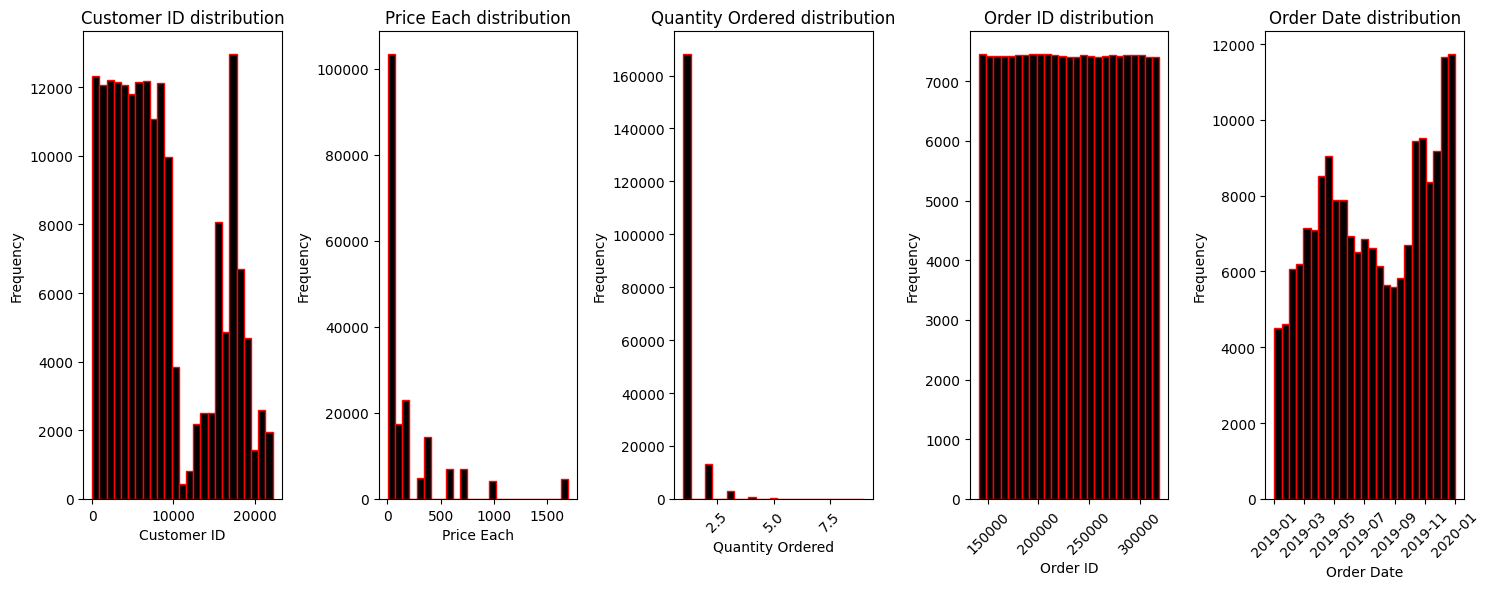

In [23]:
#T5.2: plotting the statistcal distribution and ploting the histogram for each numeric column

plt.figure(figsize=(15,6))
plt.subplot(1,5,1)
plt.hist(dataset['Customer ID'],bins=25,color='black',edgecolor='red')
plt.title('Customer ID distribution')
plt.xlabel('Customer ID')
plt.ylabel('Frequency')

plt.subplot(1,5,2)
plt.hist(dataset['Price Each'],bins=25,color='black',edgecolor='red')
plt.title('Price Each distribution')
plt.xlabel('Price Each')
plt.ylabel('Frequency')

plt.subplot(1,5,3)
plt.hist(dataset['Quantity Ordered'],bins=25,color='black',edgecolor='red')
plt.title('Quantity Ordered distribution')
plt.xlabel('Quantity Ordered')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

plt.subplot(1,5,4)
plt.hist(dataset['Order ID'],bins=25,color='black',edgecolor='red')
plt.title('Order ID distribution')
plt.xlabel('Order ID')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

plt.subplot(1,5,5)
plt.hist(dataset['Order Date'],bins=25,color='black',edgecolor='red')
plt.title('Order Date distribution')
plt.xlabel('Order Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#using plt.figure() we are creating a new figure and we are specifying the size 
#plt.title() sets the title for the figue
#plt.xlabel() sets the label on the x 
#using plt.tick we are rotating the x-axis by 45 degrees to improve readability
#plt.tight_layout() improves the layout of the plot
#plt.show() displays the figure

## Task 3 (Session 3)
### Project work 3: search, filter and group data; plot temporal/geographical distributions


- **T6:** Overview:
    - **T6.1:** Visualize a sample and a summary of the data.
- **T7:** Time distribution of sales:
    - **T7.1:** Find the dates of the first and last sales in the dataset and plot the distribution of sales over time.
    - **T7.2:** Analyze sales amounts by quarter, month, week, and day.
- **T8:** Geographic distribution of sales:
    - **T8.1:** Find the city with the greatest number of sales and the greatest volume (total value) of sales.
    - **T8.2:** Plot the distribution of the number of sales per city.
- **T9:** Customer exploratory analysis:
    - **T9.1:** Group the sales by customer and, for each customer, find the number of different purchased items, the total number of purchased items, the total number of orders, and the average amount spent per order.
    - **T9.2:** Plot the statistical distribution of those four quantities.
    
_______
_______

In [24]:
#T6.1: Sample and summary of the data
campione=dataset.sample(n=10,random_state=1)
print("\nSample:")
print(campione)

print('Summary:')
print(dataset.describe())

dataset['Order Date']=pd.to_datetime(dataset['Order Date'], format='%m/%d/%y %H:%M', dayfirst=True)



Sample:
        Order ID  Customer ID                   Product        Type  \
166243  251417.0         7974    27in 4K Gaming Monitor     Monitor   
162635  295466.0         2617  Apple Airpods Headphones  Headphones   
26685   173822.0         2852          Wired Headphones  Headphones   
102001  158836.0        15505    AAA Batteries (4-pack)   Batteries   
131706  219272.0        16125              Google Phone  Smartphone   
130744  218363.0         4419      USB-C Charging Cable       Cable   
25848   173029.0        15643              Google Phone  Smartphone   
161445  294332.0        18463          27in FHD Monitor     Monitor   
92968   193789.0         2183      USB-C Charging Cable       Cable   
29882   295998.0         8970    AAA Batteries (4-pack)   Batteries   

        Quantity Ordered  Price Each          Order Date  \
166243               1.0      389.99 2019-09-27 21:28:00   
162635               1.0      150.00 2019-11-21 16:54:00   
26685                1.0     

First sale = 2019-01-01 03:07:00
Last sale = 2020-01-01 05:13:00


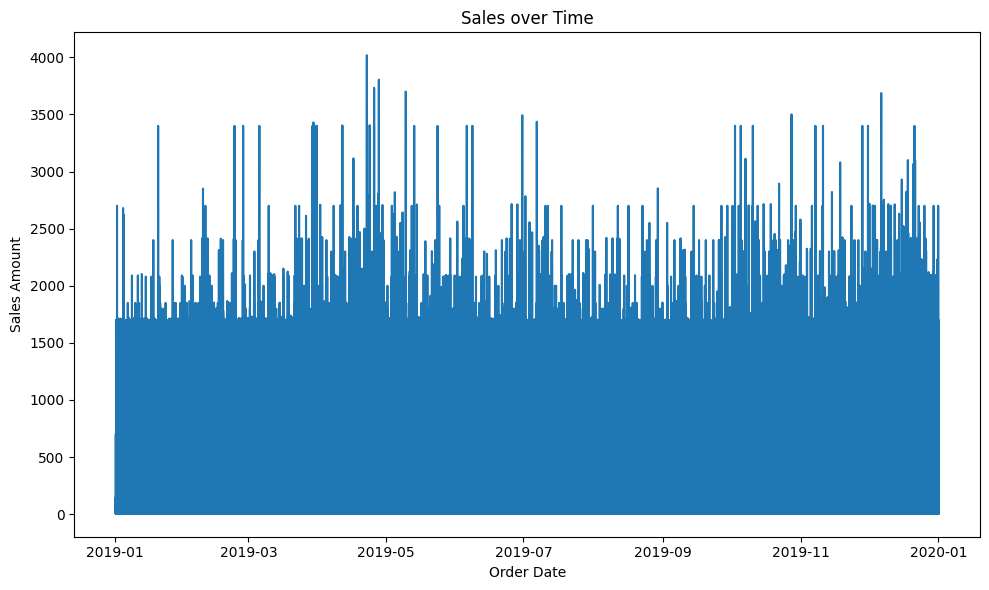

In [25]:
#T7.1: find the first and the last sale
prima=dataset['Order Date'].min()
ultima=dataset['Order Date'].max()

print("First sale =",prima)
print("Last sale =",ultima)

#calculate the sales
#.groupby() groups our dataset by 'Order Date' then .agg() for each of the dates, takes the values, sums them and then adds them in the Total column
#.reset_index() then resets the index so that we can have a ordered index
dataset['Total']=dataset['Quantity Ordered']*dataset['Price Each']
vendite=dataset.groupby('Order Date').agg({'Total': 'sum'}).reset_index()


plt.figure(figsize=(10,6))
plt.plot(vendite['Order Date'],vendite['Total'])
plt.title('Sales over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales Amount')
plt.tight_layout()
plt.show()

In [26]:
#T7.2 To analize the sales amounts by quarter, months, week and day we have to first find the sales amount we are multipling 'Quantity Ordered' and 'Price Each'
#We are adding a column for each of the 4 types, and we are using .dt.to_period('Q/M/W') to convert the date of the column 'Order Date' in quarters,months,weeks
#for day we are using .dt.date
#then we are grouping the 4 columns and the Total, then the function .sum() is returning us the sales amount

dataset['Quarter']=dataset['Order Date'].dt.to_period('Q')
dataset['Month']=dataset['Order Date'].dt.to_period('M')
dataset['Week']=dataset['Order Date'].dt.to_period('W')
dataset['Day']=dataset['Order Date'].dt.date

quadrimestre=dataset.groupby('Quarter')['Total'].sum()
mensile=dataset.groupby('Month')['Total'].sum()
settimanale=dataset.groupby('Week')['Total'].sum()
giornaliero=dataset.groupby('Day')['Total'].sum()

print("\nSales Quarter:")
print(quadrimestre)

print("\nSales Month':")
print(mensile)

print("\nSales Week:")
print(settimanale)

print("\nSales day:")
print(giornaliero)


Sales Quarter:
Quarter
2019Q1     6817794.30
2019Q2     9116114.36
2019Q3     6982010.38
2019Q4    11540948.61
2020Q1        8670.29
Freq: Q-DEC, Name: Total, dtype: float64

Sales Month':
Month
2019-01    1812742.87
2019-02    2200078.08
2019-03    2804973.35
2019-04    3389217.98
2019-05    3150616.23
2019-06    2576280.15
2019-07    2646461.32
2019-08    2241083.37
2019-09    2094465.69
2019-10    3734777.86
2019-11    3197875.05
2019-12    4608295.70
2020-01       8670.29
Freq: M, Name: Total, dtype: float64

Sales Week:
Week
2018-12-31/2019-01-06     344678.73
2019-01-07/2019-01-13     409389.43
2019-01-14/2019-01-20     394921.11
2019-01-21/2019-01-27     426020.17
2019-01-28/2019-02-03     459570.62
2019-02-04/2019-02-10     565300.05
2019-02-11/2019-02-17     568199.28
2019-02-18/2019-02-24     535207.51
2019-02-25/2019-03-03     578306.44
2019-03-04/2019-03-10     640496.38
2019-03-11/2019-03-17     595771.07
2019-03-18/2019-03-24     629060.55
2019-03-25/2019-03-31     67087

In [27]:
#T8.1: we are using the 'City' column. .value_count() counts the number of times each city appears in the 'City' column
#groupby('City')['Total'].sum(): Groups the data by city and calculates the sum of the 'Total' column for each group (city).
#.idxmax() return the index with the maximum value in sales and income

vendite=dataset['City'].value_counts()
incasso=dataset.groupby('City')['Total'].sum()

cittaPiuVen=vendite.idxmax()
cittaPiuInc=incasso.idxmax()

print("City most sales",cittaPiuVen)
print("City most income'",cittaPiuInc)



City most sales  San Francisco
City most income'  San Francisco


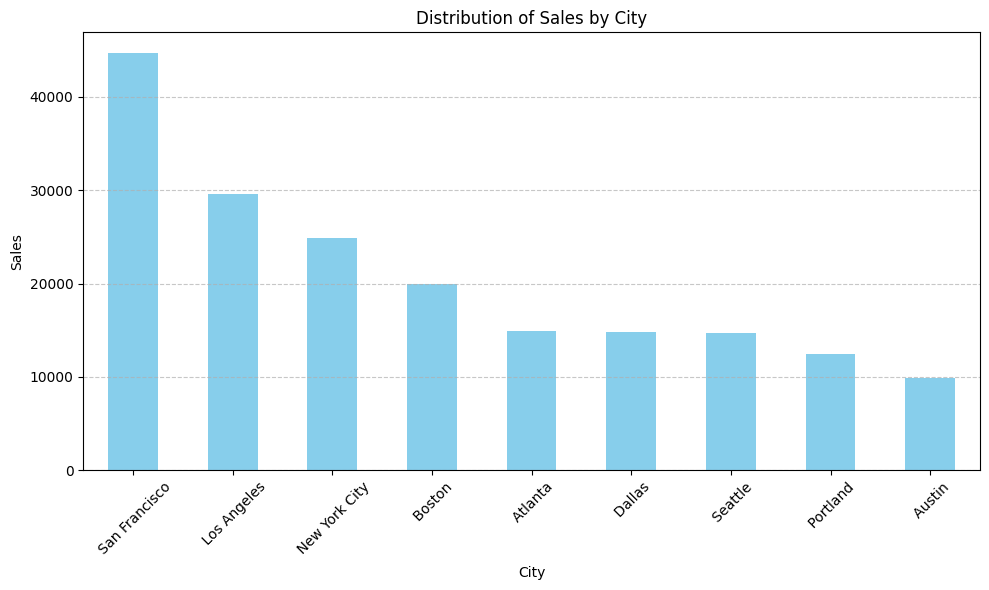

In [29]:
#T8.2: Plot the distribution 
plt.figure(figsize=(10, 6))
vendite.plot(kind='bar', color='skyblue')
plt.title('Distribution of Sales by City')
plt.xlabel('City')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [45]:
#T9.1: we are grouping the dataset by the'Customer ID' column, ['Product'].nunique() for each customer, this calculates the number of unique products they have ordered.
#['Quantity Ordered'].sum() For each customer, this calculates the total quantity of items they have ordered.
#['Order ID'].nunique() For each customer, this calculates the number of unique orders they have placed.
#['Total'].mean() For each customer, this calculates the average spending per order.

g=dataset.groupby('Customer ID')

numOggDiv=g['Product'].nunique()

numTotOgg=g['Quantity Ordered'].sum()

numTotOrd=g['Order ID'].nunique()

mediaSpesa=g['Total'].mean()



             # oggetti diversi  # totale oggetti  # totale ordini  \
Customer ID                                                         
1                            7              24.0               17   
2                           11              20.0               17   
3                           10              31.0               25   
5                            8              17.0               16   
6                           11              19.0               17   
...                        ...               ...              ...   
22204                       11              19.0               19   
22205                       12              23.0               20   
22211                        7              13.0               11   
22213                        8              13.0               12   
22217                       12              19.0               19   

             Media spesa per ordine  
Customer ID                          
1                        1

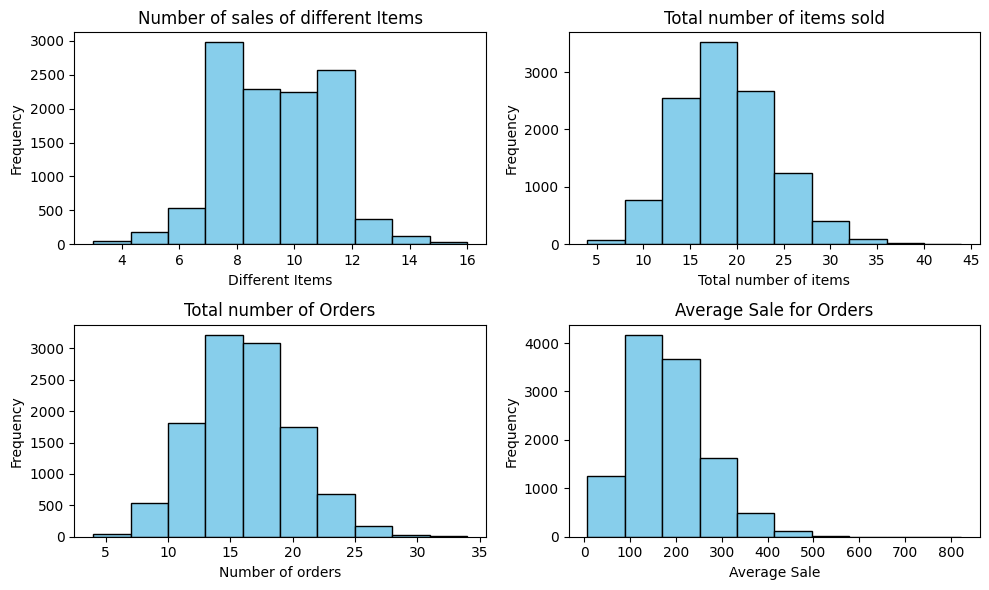

In [46]:
#T9.2: Plotting the statistical distribution 
riepilogo=pd.DataFrame({
    '# oggetti diversi':numOggDiv,
    '# totale oggetti':numTotOgg,
    '# totale ordini':numTotOrd,
    'Media spesa per ordine':mediaSpesa
})

print(riepilogo)
#This combines the calculated statistics into a new DataFrame riepilogo. Each row in this DataFrame corresponds to a customer

fig, axs = plt.subplots(2, 2, figsize=(10, 6))

axs[0, 0].hist(riepilogo['# oggetti diversi'], bins=10, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Number of sales of different Items')
axs[0, 0].set_xlabel('Different Items')
axs[0, 0].set_ylabel('Frequency')

# Numero totale di articoli acquistati
axs[0, 1].hist(riepilogo['# totale oggetti'], bins=10, color='skyblue', edgecolor='black')
axs[0, 1].set_title('Total number of items sold')
axs[0, 1].set_xlabel('Total number of items')
axs[0, 1].set_ylabel('Frequency')

# Numero totale di ordini
axs[1, 0].hist(riepilogo['# totale ordini'], bins=10, color='skyblue', edgecolor='black')
axs[1, 0].set_title('Total number of Orders')
axs[1, 0].set_xlabel('Number of orders')
axs[1, 0].set_ylabel('Frequency')

# Spesa media per ordine
axs[1, 1].hist(riepilogo['Media spesa per ordine'], bins=10, color='skyblue', edgecolor='black')
axs[1, 1].set_title('Average Sale for Orders')
axs[1, 1].set_xlabel('Average Sale')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Task 4 (Session 4)
### Project work 4: skewness, percentiles, histograms, boxplots, outliers

### Product analysis ###

- **T10:** Top sellers:
    - **T10.1:** Find the number of units sold for each item and plot the distribution of these numbers.
    - **T10.2:** Find the 10 top selling products by number of units sold.
    - **T10.3:** Find the 10 top selling products by total value of sales.
    - **T10.4:** Group the sales by item type and plot the distribution of the number of units sold per type.
    - **T10.5:** Verify and discuss the presence of outliers in the distributions obtained in T10.1 and T10.4.
    
_______
_______

Quantity sold of each object:
Product
20in Monitor                   4126.0
27in 4K Gaming Monitor         6239.0
27in FHD Monitor               7541.0
34in Ultrawide Monitor         6192.0
AA Batteries (4-pack)         27615.0
AAA Batteries (4-pack)        30986.0
Apple Airpods Headphones      15637.0
Bose SoundSport Headphones    13430.0
Flatscreen TV                  4813.0
Google Phone                   5529.0
LG Dryer                        646.0
LG Washing Machine              666.0
Lightning Charging Cable      23169.0
Macbook Pro Laptop             4725.0
ThinkPad Laptop                4128.0
USB-C Charging Cable          23931.0
Vareebadd Phone                2068.0
Wired Headphones              20524.0
iPhone                         6847.0
Name: Quantity Ordered, dtype: float64


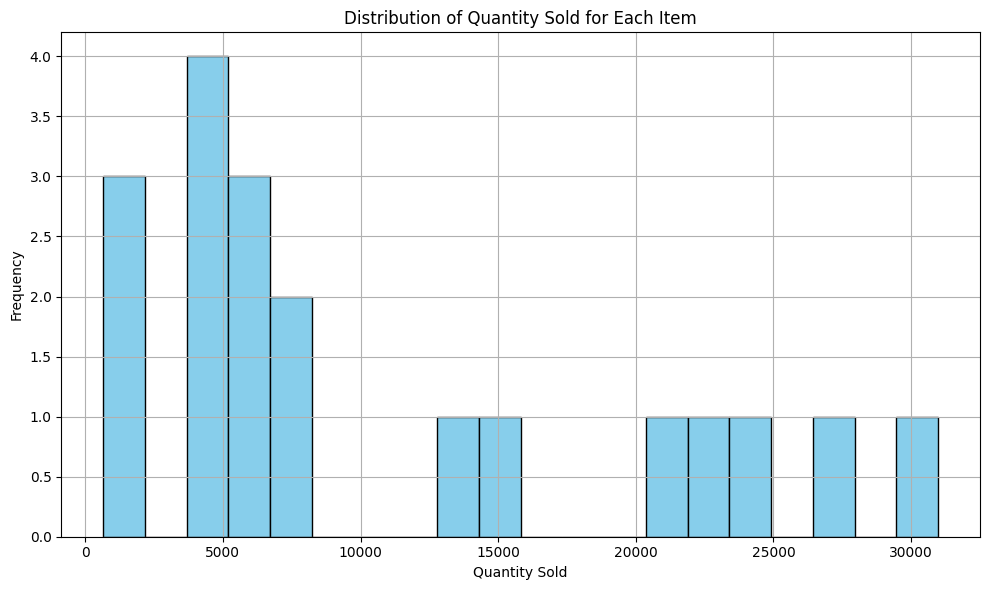

In [35]:
#T10.1: we are grouping the data by Product and then we are summing the 'Quantity Ordered' column 
quantita_per_oggetto = dataset.groupby('Product')['Quantity Ordered'].sum()

print("Quantity sold of each object:")
print(quantita_per_oggetto)

#then we plot it 
plt.figure(figsize=(10, 6))
plt.hist(quantita_per_oggetto, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Quantity Sold for Each Item')
plt.xlabel('Quantity Sold')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
#T10.2: we find the top 10 with .sort_values()
topTenQuant=quantita_per_oggetto.sort_values(ascending=False).head(10)

print("\nTop 10 sold objects:")
print(topTenQuant)


Top 10 sold objects:
Product
AAA Batteries (4-pack)        30986.0
AA Batteries (4-pack)         27615.0
USB-C Charging Cable          23931.0
Lightning Charging Cable      23169.0
Wired Headphones              20524.0
Apple Airpods Headphones      15637.0
Bose SoundSport Headphones    13430.0
27in FHD Monitor               7541.0
iPhone                         6847.0
27in 4K Gaming Monitor         6239.0
Name: Quantity Ordered, dtype: float64


In [37]:
#T10.3:  we are grouping the data by Product and then we are summing the 'Total' column
# then sorts the series in descending order based on the values and then selects the top 10
dataset['Total']=dataset['Quantity Ordered']*dataset['Price Each']

incassoPerOgg=dataset.groupby('Product')['Total'].sum()

topTenInc=incassoPerOgg.sort_values(ascending=False).head(10)

print("\nTop 10 revenue generating objects :")
print(topTenInc)


Top 10 revenue generating objects :
Product
Macbook Pro Laptop            8032500.00
iPhone                        4792900.00
ThinkPad Laptop               4127958.72
Google Phone                  3317400.00
27in 4K Gaming Monitor        2433147.61
34in Ultrawide Monitor        2352898.08
Apple Airpods Headphones      2345550.00
Flatscreen TV                 1443900.00
Bose SoundSport Headphones    1342865.70
27in FHD Monitor              1131074.59
Name: Total, dtype: float64


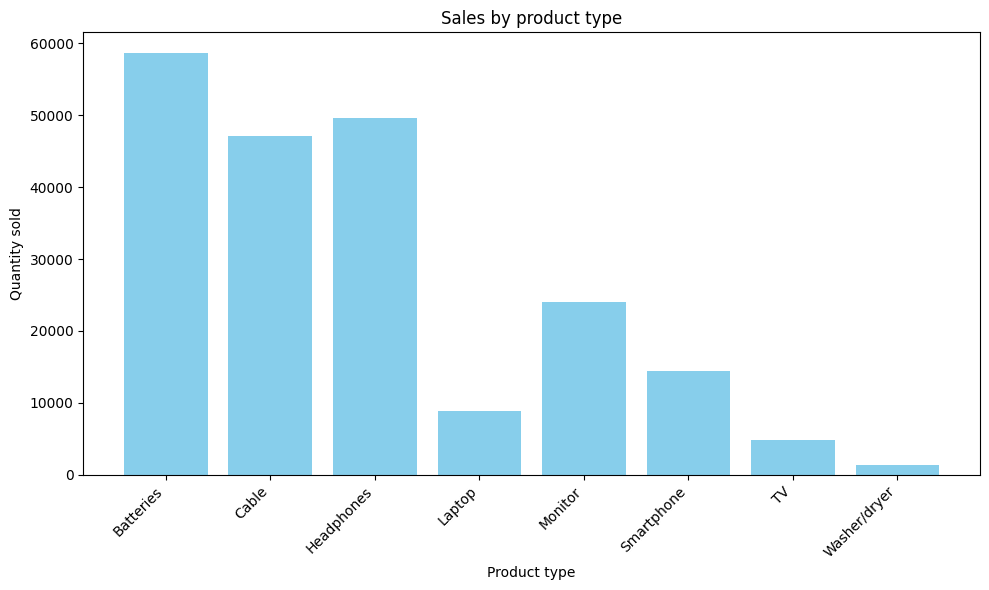

In [38]:
#T10.4 we are grouping Type by Quantity Ordered and plotting the distribution 
sales_by_product_type = dataset.groupby('Type')['Quantity Ordered'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(sales_by_product_type['Type'], sales_by_product_type['Quantity Ordered'], color='skyblue')
plt.xlabel('Product type')
plt.ylabel('Quantity sold')
plt.title('Sales by product type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

                count      mean       std  min  25%  50%  75%  max
Type                                                              
Batteries     41170.0  1.423391  0.783351  1.0  1.0  1.0  2.0  9.0
Cable         43469.0  1.083531  0.302656  1.0  1.0  1.0  1.0  6.0
Headphones    47672.0  1.040254  0.213932  1.0  1.0  1.0  1.0  4.0
Laptop         8847.0  1.000678  0.026035  1.0  1.0  1.0  1.0  2.0
Monitor       23995.0  1.004293  0.065378  1.0  1.0  1.0  1.0  2.0
Smartphone    14427.0  1.001178  0.034308  1.0  1.0  1.0  1.0  2.0
TV             4794.0  1.003963  0.062836  1.0  1.0  1.0  1.0  2.0
Washer/dryer   1312.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0


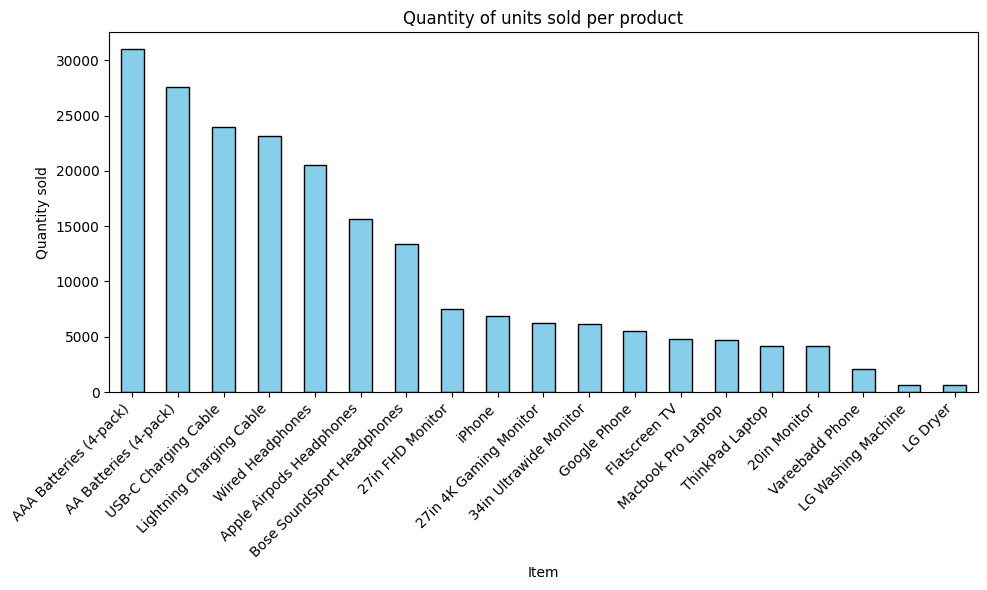

Outliers in the distribution of the number of sales per item:
Series([], Name: Quantity Ordered, dtype: float64)


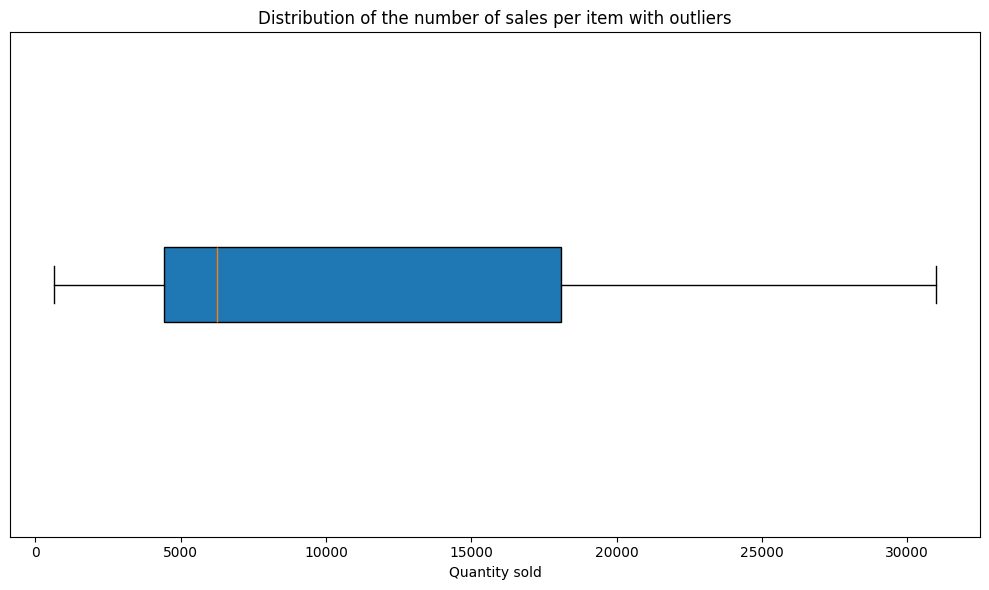

In [42]:
#T10.5 we are grouping Type by Quantity Ordered 
sommario=dataset.groupby('Type')['Quantity Ordered'].describe()
print(sommario)

#using plt.figure() we are creating a new figure and we are specifying the size 
#plt.title() sets the title for the figue
#plt.xlabel() sets the label on the x 
#using plt.tick we are rotating the x-axis by 45 degrees to improve readability
#plt.tight_layout() improves the layout of the plot
#plt.show() displays the figure

quantita_per_oggetto = dataset.groupby('Product')['Quantity Ordered'].sum()


quantita_per_oggetto = quantita_per_oggetto.sort_values(ascending=False)


plt.figure(figsize=(10, 6))
quantita_per_oggetto.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Quantity of units sold per product')
plt.xlabel('Item')
plt.ylabel('Quantity sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#T10.5 we are going to calculate the first and third quartile and our IQR=Interquartile Range so the difference between Q1 and Q3
#lower and upper bound define our inferior and superior limit
#outliners contains the items that have a quantity sold per item outside the outlier limits
Q1 = quantita_per_oggetto.quantile(0.25)
Q3 = quantita_per_oggetto.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = quantita_per_oggetto[(quantita_per_oggetto < lower_bound) | (quantita_per_oggetto > upper_bound)]

print("Outliers in the distribution of the number of sales per item:")
print(outliers)

plt.figure(figsize=(10, 6))
plt.boxplot(quantita_per_oggetto, vert=False, patch_artist=True, flierprops=dict(marker='o', markersize=8, markerfacecolor='red', markeredgecolor='black'))
plt.title('Distribution of the number of sales per item with outliers')
plt.xlabel('Quantity sold')
plt.yticks([])
plt.tight_layout()
plt.show()